# Build basic 2-Layer MLP to solve the xor-Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [2]:
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=.1
                  ,centers= [(1,1), (1,0), (0,0),(0,1)])

In [3]:
#make it a binary classification problem
y[y==2]=0
y[y==3]=1

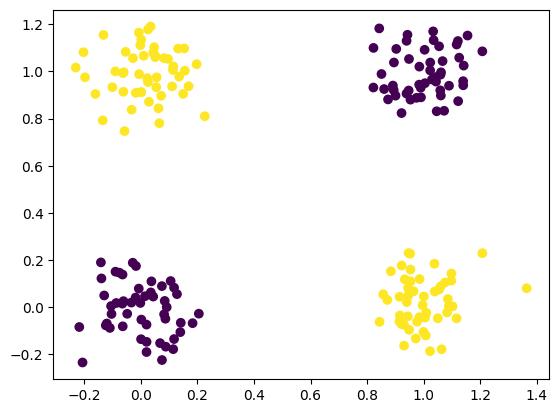

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

## Steps:
* build train and test sets
* write MLP class in Pytorch with two layers with adjustable number of perceptrons
* use nn.linear and nn.Sigmoid() units
* train your model
* test your model

In [5]:
import torch
class MLP(torch.nn.Module): #all nets inherit from nn.Module
    def __init__(self): #define layer types
        super(MLP, self).__init__()
        self.fc1 = torch.nn.Linear(2,4,bias=False) #1st layer input dim = 2, output =4 - | input needs to have size of data
        self.fc2 = torch.nn.Linear(4,1,bias=False) #2nd layer input 4 out put 2 | output needs to be one for binary problem
        self.non_linear = torch.nn.Sigmoid() #non-linear activation

    def forward(self, x): #build network
        output = self.fc1(x) #w*X
        output = self.non_linear(output) # activation
        output = self.fc2(output) #w*X
        output = self.non_linear(output) # activation
        return output

In [6]:

from sklearn.model_selection import train_test_split #for test set generation
#split in train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#np->torch
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)


In [7]:
print(x_train.shape,y_train.shape)

torch.Size([134, 2]) torch.Size([134])


In [8]:
#get instance of perceptron model
model = MLP()

#define loss function
criterion = torch.nn.BCELoss()

#define optimizer -> SGD with learning rate lr
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [9]:
#show model
print(model)

MLP(
  (fc1): Linear(in_features=2, out_features=4, bias=False)
  (fc2): Linear(in_features=4, out_features=1, bias=False)
  (non_linear): Sigmoid()
)


In [10]:
model.train() #set to train mode
iterations = 500
for iter in range(iterations):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)

    print('Iter {}: train loss: {}'.format(iter, loss.item()))
    # Backward pass
    loss.backward()
    #make gradient update
    optimizer.step()

Iter 0: train loss: 0.6973087787628174
Iter 1: train loss: 0.6972689032554626
Iter 2: train loss: 0.6972293257713318
Iter 3: train loss: 0.6971898674964905
Iter 4: train loss: 0.6971505284309387
Iter 5: train loss: 0.6971113681793213
Iter 6: train loss: 0.6970723867416382
Iter 7: train loss: 0.6970335841178894
Iter 8: train loss: 0.696994960308075
Iter 9: train loss: 0.6969563364982605
Iter 10: train loss: 0.6969178915023804
Iter 11: train loss: 0.6968796849250793
Iter 12: train loss: 0.6968416571617126
Iter 13: train loss: 0.6968037486076355
Iter 14: train loss: 0.6967659592628479
Iter 15: train loss: 0.6967284083366394
Iter 16: train loss: 0.6966909170150757
Iter 17: train loss: 0.6966536045074463
Iter 18: train loss: 0.6966164708137512
Iter 19: train loss: 0.6965794563293457
Iter 20: train loss: 0.6965426802635193
Iter 21: train loss: 0.6965058445930481
Iter 22: train loss: 0.6964693665504456
Iter 23: train loss: 0.6964329481124878
Iter 24: train loss: 0.6963965892791748
Iter 25: tr

In [11]:
#test
y_pred = model(x_test) #predict
y_pred=(y_pred>0.5).int().flatten() #argmax class lable
test_acc = torch.sum(y_pred == y_test.int())/y_test.shape[0] #check result: devide num of correct ones by num of samples, need to cast to int
print("test ACC: ",test_acc.float())

test ACC:  tensor(0.3788)
